In [12]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 図やグラフを図示するためのライブラリをインポートする。
%matplotlib inline
import matplotlib.pyplot as plt
# pandas.plotting <- from pandas.tools import plotting

# 機械学習関連のライブラリ群

# from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.model_selection import train_test_split # 訓練データとテストデータに分割
from sklearn.metrics import confusion_matrix # 混合行列

from sklearn.decomposition import PCA #主成分分析
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.neighbors import KNeighborsClassifier # K近傍法
from sklearn.svm import SVC # サポートベクターマシン
from sklearn.tree import DecisionTreeClassifier # 決定木
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.naive_bayes import GaussianNB # ナイーブ・ベイズ
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # 線形判別分析
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA # 二次判別分析

In [67]:
#データ読み込み
df1 = pd.read_csv('datasets.csv')
df1.head()


,x,y,z,label
0,2195.338624,2100.612991,775.22462,0
1,2195.338624,2100.612991,775.22462,0
2,2195.338624,2100.612991,775.22462,0
3,2195.338624,2100.612991,775.22462,0
4,2195.338624,2100.612991,775.22462,0


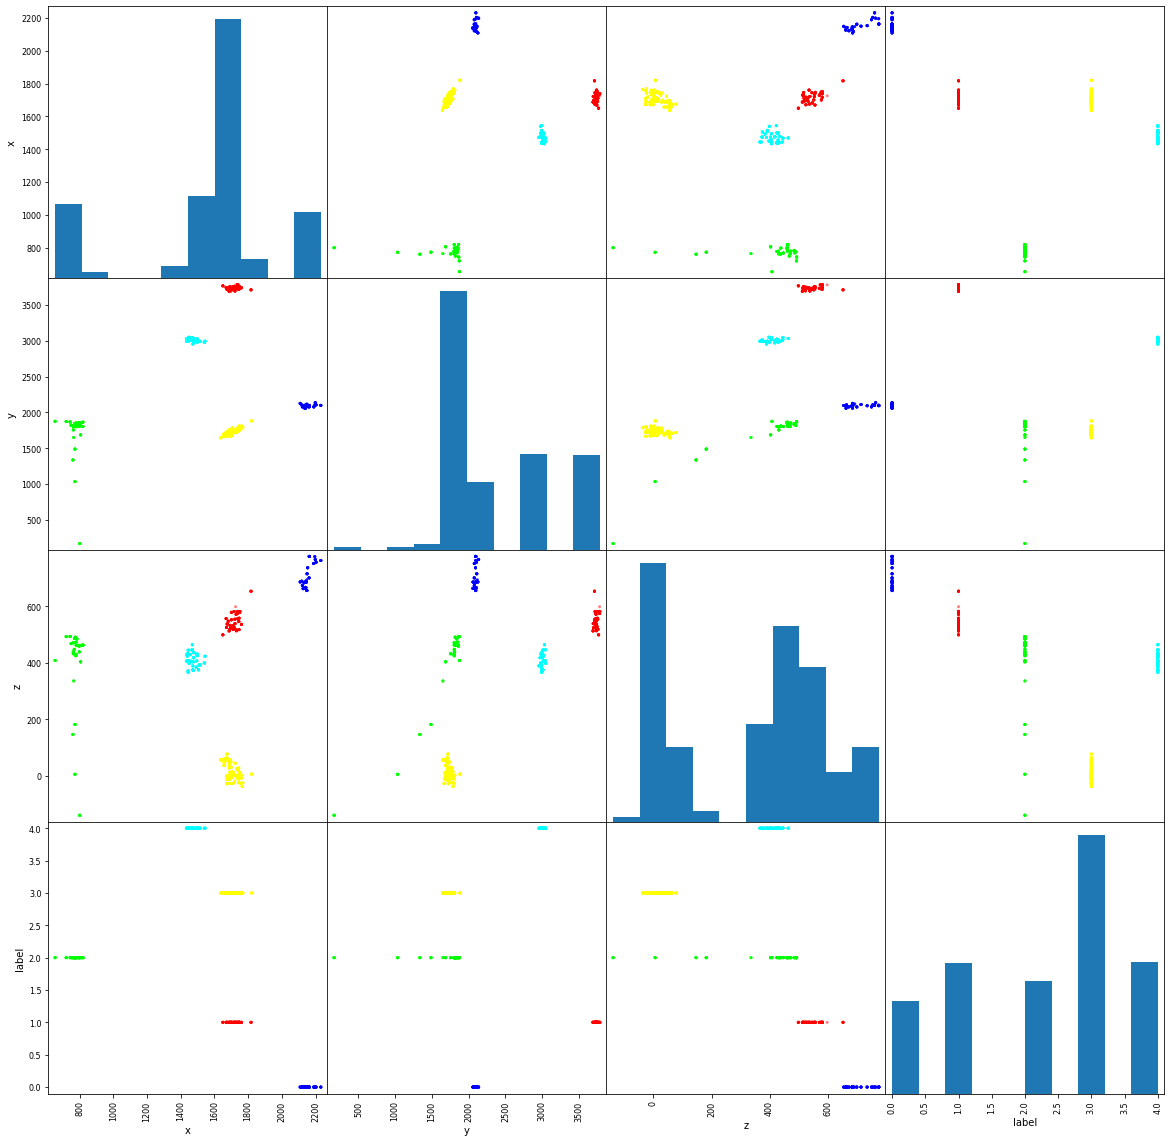

In [68]:
# 散布図
colors_codes = {0:'#0000ff', 1:'#ff0000', 2:'#00ff00', 3:'#ffff00', 4:'#00ffff'}
colors = [colors_codes[x] for x in df1['label'].tolist()]
pd.plotting.scatter_matrix(df1.dropna(axis=1)[df1.columns[:11]], figsize=(20, 20), color=colors, alpha=0.5)
plt.show()

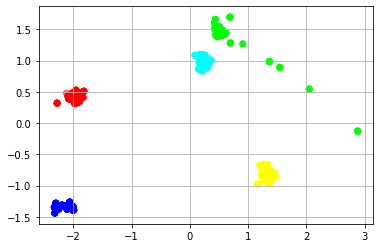

In [69]:
dfs = df1.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

pca = PCA()
pca.fit(dfs.iloc[:, :11])
feature = pca.transform(dfs.iloc[:, :11])

plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, color=colors)
plt.grid()
plt.show()

In [70]:
#説明変数と目的変数
X = dfs.iloc[:, :3]
y = df1.iloc[:, 3:]
X.head()


,x,y,z
0,1.565255,-0.325419,1.704585
1,1.565255,-0.325419,1.704585
2,1.565255,-0.325419,1.704585
3,1.565255,-0.325419,1.704585
4,1.565255,-0.325419,1.704585


In [71]:
pd.DataFrame(y).T

,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
label,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [72]:
# 訓練とテストに分ける

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)


In [73]:
X_train.head()


,x,y,z
1064,0.234849,-0.835315,-1.261685
617,-2.058278,-0.645881,0.598967
121,1.424980,-0.378177,1.275192
166,1.435078,-0.358813,1.356981
666,0.483028,-0.707982,-1.350432


In [74]:
pd.DataFrame(y_train).T

,1064,617,121,166,666,738,549,8,585,1350,...,725,756,985,529,303,978,1412,112,757,587
label,3,2,0,0,3,3,2,0,2,4,...,3,3,3,2,1,3,4,0,3,2


In [75]:
clf = LogisticRegression()
clf.fit(X_train, y_train)


/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
clf.score(X_train, y_train)



1.0

In [77]:
clf.score(X_test, y_test)

1.0

In [78]:
y_predict = clf.predict(X_test)

In [79]:
pd.DataFrame(y_predict).T

,0,1,2,3,4,5,6,7,8,9,...,565,566,567,568,569,570,571,572,573,574
0,0,0,3,1,3,3,2,3,1,1,...,3,0,4,3,3,0,1,3,3,2


In [80]:
# 様々な分類をしよう
names = ["Logistic Regression", "Nearest Neighbors", 
         "Linear SVM", "Polynomial SVM", "RBF SVM", "Sigmoid SVM", 
         "Decision Tree","Random Forest", "AdaBoost", "Naive Bayes", 
         "Linear Discriminant Analysis","Quadratic Discriminant Analysis"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="poly"),
    SVC(kernel="rbf"),
    SVC(kernel="sigmoid"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]

In [81]:
result = []
for name, clf in zip(names, classifiers): # 指定した複数の分類機を順番に呼び出す
    clf.fit(X_train, y_train) # 学習
    score1 = clf.score(X_train, y_train) # 正解率（train）の算出
    score2 = clf.score(X_test, y_test) # 正解率（test）の算出
    result.append([score1, score2]) # 結果の格納

# test の正解率の大きい順に並べる
df_result = pd.DataFrame(result, columns=['train', 'test'], index=names).sort_values('test', ascending=False)

/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: Data

In [82]:
df_result

,train,test
Logistic Regression,1.0000,1.000000
Nearest Neighbors,1.0000,1.000000
Linear SVM,1.0000,1.000000
Polynomial SVM,1.0000,1.000000
RBF SVM,1.0000,1.000000
Decision Tree,1.0000,1.000000
Random Forest,1.0000,1.000000
AdaBoost,1.0000,1.000000
Naive Bayes,1.0000,1.000000
Linear Discriminant Analysis,1.0000,1.000000


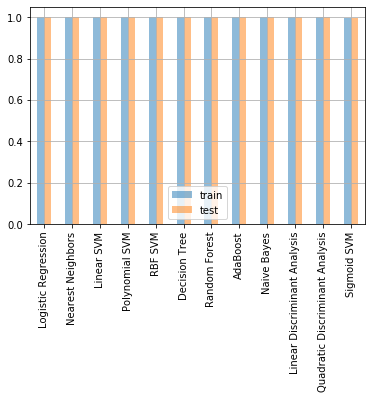

In [83]:
df_result.plot(kind='bar', alpha=0.5, grid=True)

In [84]:
# 訓練データをランダムに行います
result = []
for trial in range(20): # 20 回繰り返す
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # 訓練データ・テストデータの生成
    for name, clf in zip(names, classifiers): # 指定した複数の分類機を順番に呼び出す
        clf.fit(X_train, y_train) # 学習
        score1 = clf.score(X_train, y_train) # 正解率（train）の算出
        score2 = clf.score(X_test, y_test) # 正解率（test）の算出
        result.append([name, score1, score2]) # 結果の格納

df_result = pd.DataFrame(result, columns=['classifier', 'train', 'test'])

/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was 

/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was 

/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was 

/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was 

/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was 

/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mashimo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was 

In [90]:
df_result_mean = df_result.groupby('classifier').mean().sort_values('test', ascending=False)
df_result_mean

,train,test
classifier,,
Decision Tree,1.000000,1.000000
Linear Discriminant Analysis,1.000000,1.000000
Linear SVM,1.000000,1.000000
Logistic Regression,1.000000,1.000000
Naive Bayes,1.000000,1.000000
Nearest Neighbors,1.000000,1.000000
Polynomial SVM,1.000000,1.000000
Quadratic Discriminant Analysis,1.000000,1.000000
RBF SVM,1.000000,1.000000


In [91]:
errors = df_result.groupby('classifier').std()
errors

,train,test
classifier,,
AdaBoost,0.040208,0.041221
Decision Tree,0.000000,0.000000
Linear Discriminant Analysis,0.000000,0.000000
Linear SVM,0.000000,0.000000
Logistic Regression,0.000000,0.000000
Naive Bayes,0.000000,0.000000
Nearest Neighbors,0.000000,0.000000
Polynomial SVM,0.000000,0.000000
Quadratic Discriminant Analysis,0.000000,0.000000


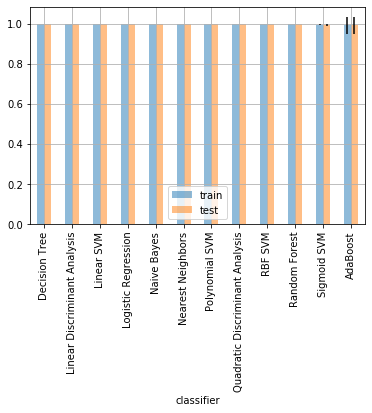

In [92]:
df_result_mean.plot(kind='bar', alpha=0.5, grid=True, yerr=errors)